In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

In [3]:
%%manim -qm -v WARNING MmodN

class MmodN(Scene):
    def construct(self):
        circle = Circle().set(height=config.frame_height)
        circle.scale(0.85)
        circle.to_edge(RIGHT,buff=1)
        self.play(Create(circle))
        for x,y in [(2,100),(3,60),(4,60),(5,70)]:
            self.show_lines(self.get_m_mod_n_objects(x,y,circle),x,y)
        self.play(FadeOut(circle))
        self.wait()
       
    def show_lines(self,obj,x,y):
        circle,lines = obj
        lines.set_stroke(width=1)
        label = MathTex(f"f({x},{y})").scale(2.5).to_edge(LEFT,buff=1)
        VGroup(circle,lines).to_edge(RIGHT,buff=1)
        self.play(
                Write(label),
                Write(lines)
            )
        self.wait()
        self.play(FadeOut(lines),Unwrite(label))
        self.wait()

    def get_m_mod_n_objects(self,x,y,circle):
        lines = VGroup()
        for i in range(y):
            start_point = circle.point_from_proportion((i%y)/y)
            end_point = circle.point_from_proportion(((i*x)%y)/y)
            line = Line(start_point,end_point).set_stroke(width=1)
            lines.add(line)
        return [circle,lines]



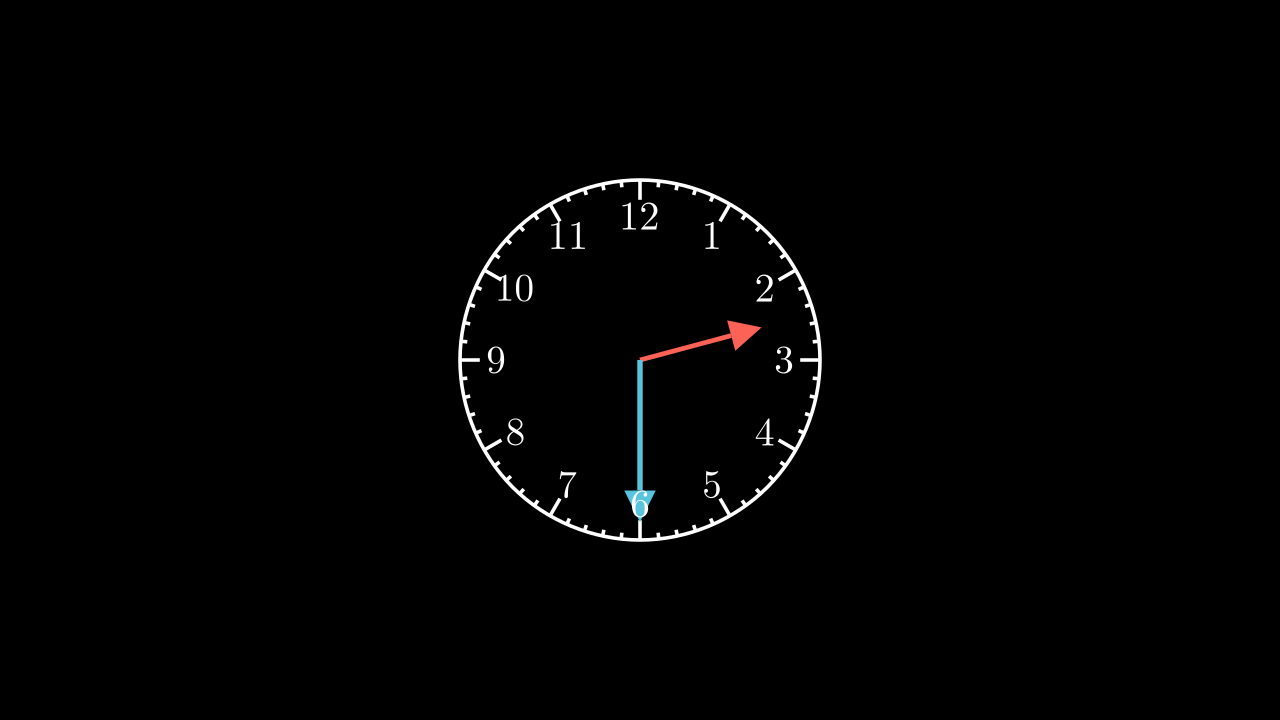

In [4]:
%%manim -qm -v WARNING Clock

class Clock(Scene):
    def construct(self):
        circle = Circle(radius=2,color=WHITE)\
            .rotate(90*DEGREES)\
            .flip(UP) # Why this? Try to remove it
        # self.add(Dot(circle.get_start())) # see that the start point is the top
        minutes_ticks = VGroup(*[
            Line(
                circle.get_center(),
                circle.point_from_proportion(i/60)
            ).get_subcurve(0.89 if i%5==0 else 0.965,1)
            for i in range(60)
        ])

        hours = [12,*range(1,12)]

        hours_tex = VGroup(*[
            MathTex(h)
                .set(height=0.3)
                .move_to(
                Line(
                    circle.get_center(),
                    circle.point_from_proportion(i/12)
                ).point_from_proportion(0.8)
            )
            for h,i in zip(hours,range(12))
        ])
        # hours + minutes
        hour_tr = 2+30j

        hour_arrow = Arrow(
                circle.get_center(),
                circle.point_from_proportion(
                    ((hour_tr.real+hour_tr.imag/60)%12)/12
                ),
                buff=0,
                color=RED
            ).scale(0.7,about_point=circle.get_center())

        minute_arrow = Arrow(
                circle.get_center(),
                circle.point_from_proportion(
                    ((hour_tr.imag)%60)/60
                ),
                buff=0,
                color=BLUE
            ).scale(0.9,about_point=circle.get_center())

        self.add(circle, minutes_ticks, hour_arrow, minute_arrow, hours_tex)

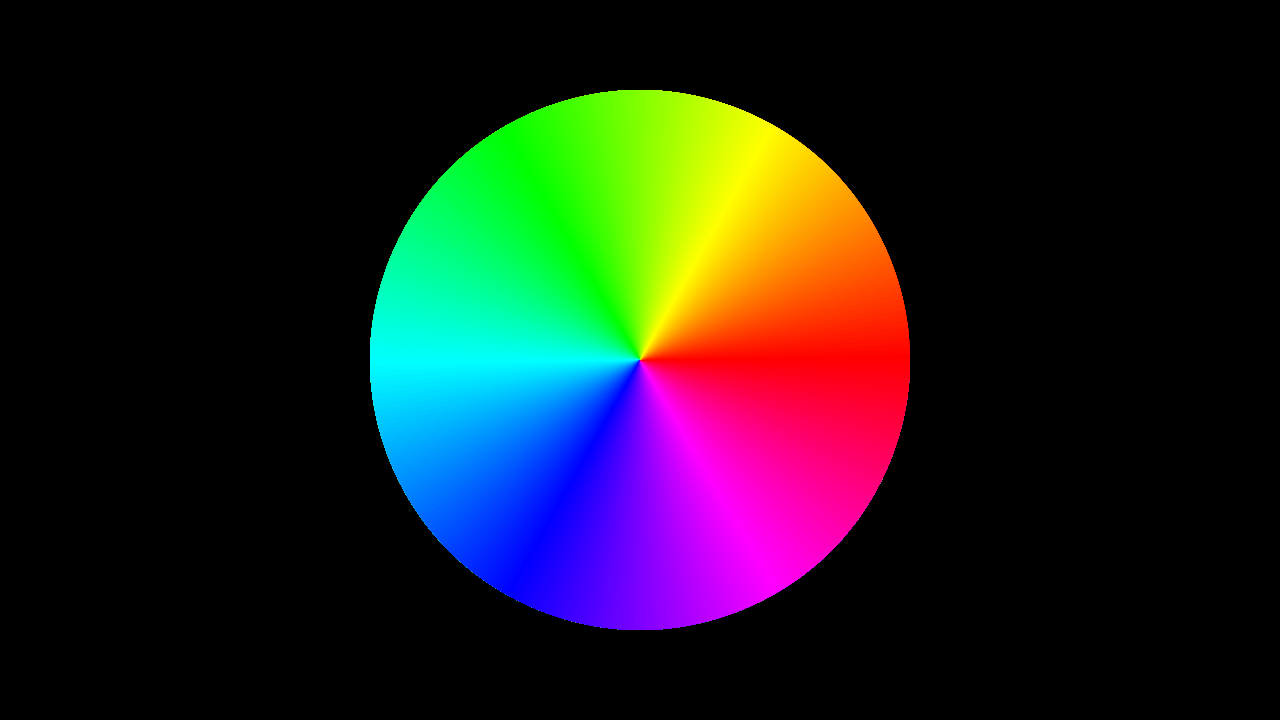

In [5]:
%%manim -qm -v WARNING Slices

class Slices(Scene):
    def construct(self):
        circle = Circle().scale(3)

        from colour import Color
        def HSL(hue,saturation=1,lightness=0.5):
            return Color(hsl=(hue,saturation,lightness))

        def get_slice(circle,prop,color):
            c = circle.get_subcurve(prop,prop+1)
            slice = VMobject(fill_opacity=1,stroke_width=0)
            slice.append_vectorized_mobject(
                Line(circle.get_center(),c.get_start())
            )
            slice.append_vectorized_mobject(c)
            slice.append_vectorized_mobject(
                Line(c.get_end(), circle.get_center())
            )
            slice.set_color(color)
            return slice
        partitions = 300
        colors = [HSL(i/partitions) for i in range(partitions)]

        slices = VGroup(*[
            get_slice(circle, prop/partitions, color)
            for prop,color in zip(range(partitions),colors)
        ])

        self.add(slices)

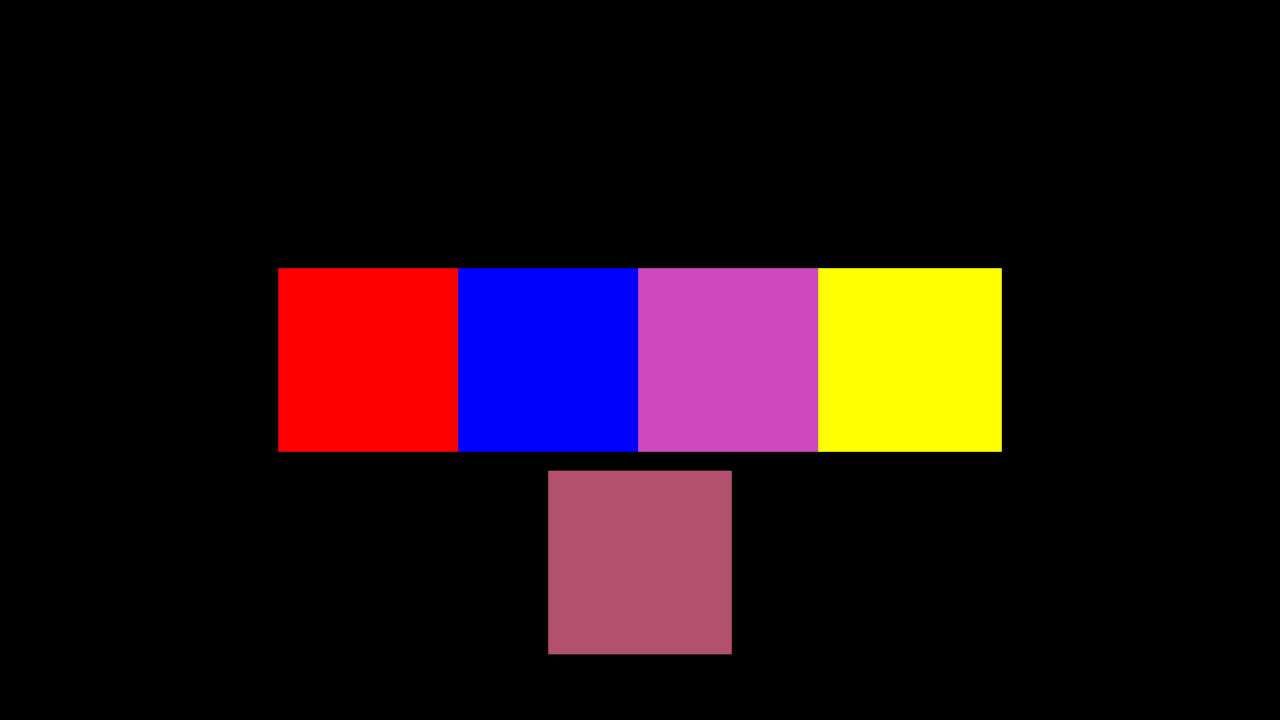

In [6]:
%%manim -qm -v WARNING Ex1

class Ex1(Scene):
    def construct(self):
        colors = [PURE_RED, PURE_BLUE, PINK, YELLOW]
        sq_grp = VGroup(*[Square(fill_opacity=1,color=c) for c in colors])
        sq_grp.arrange(RIGHT,buff=0)

        ac = average_color(*colors)
        sq = Square(fill_opacity=1,color=ac)\
            .next_to(sq_grp,DOWN)

        self.add(sq_grp,sq)

In [7]:
def interpolate_color_range(*colors):
    alpha = colors[-1]
    colors = colors[:-1]
    partition = len(colors)
    dx = 1 / (partition-1)
    colors_steps = [
        (colors[i],colors[i+1])
        for i in range(partition-1)
    ]
    alpha_steps = [
        (dx * i, dx * (i+1))
        for i in range(partition-1)
    ]
    i_count = 0
    for c_s,a_s in zip(colors_steps,alpha_steps):
        if a_s[0] <= alpha <= a_s[1]:
            d_alpha = alpha - dx * i_count
            c_alpha = d_alpha / dx
            return interpolate_color(c_s[0], c_s[1], c_alpha)
        i_count += 1

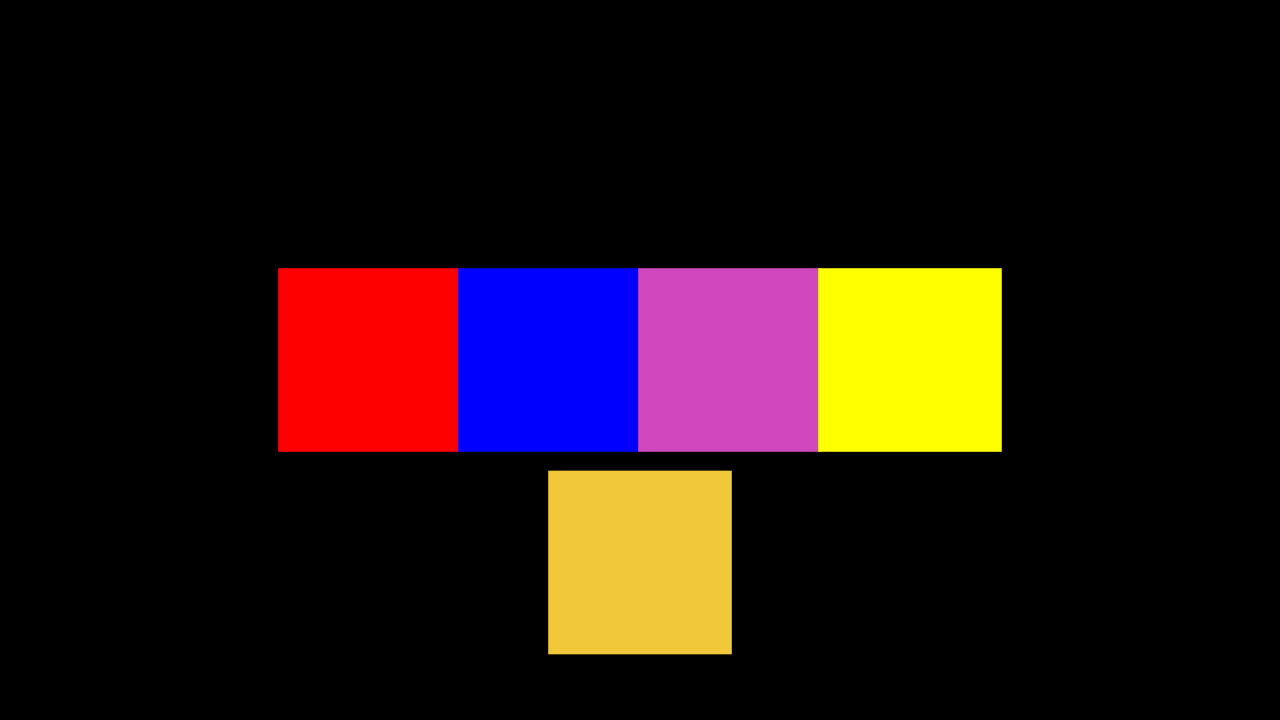

In [8]:
%%manim -qm -v WARNING Ex2

class Ex2(Scene):
    def construct(self):
        colors = [PURE_RED, PURE_BLUE, PINK, YELLOW]
        sq_grp = VGroup(*[Square(fill_opacity=1,color=c) for c in colors])
        sq_grp.arrange(RIGHT,buff=0)

        ac = interpolate_color_range(*colors,0.9)
        sq = Square(fill_opacity=1,color=ac)\
            .next_to(sq_grp,DOWN)

        self.add(sq_grp,sq)

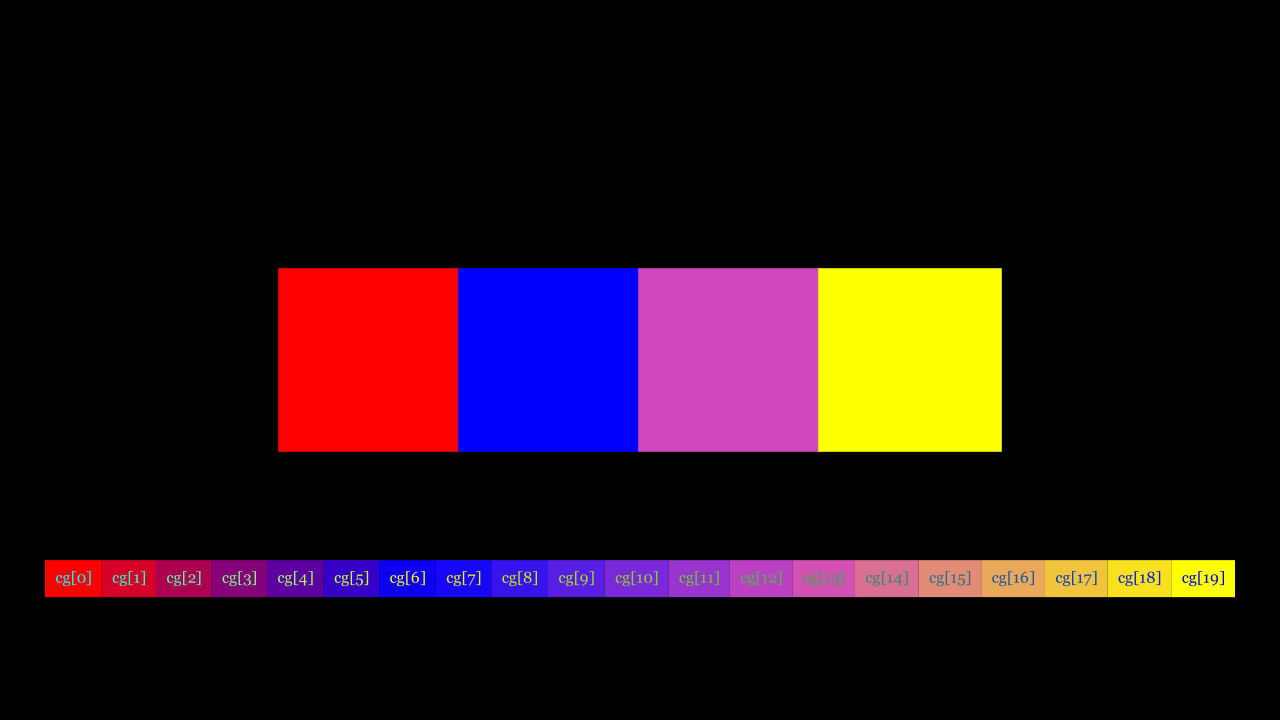

In [9]:
%%manim -qm -v WARNING Ex3

class Ex3(Scene):
    def construct(self):
        colors = [PURE_RED, PURE_BLUE, PINK, YELLOW]
        LENGTH_PALETTE = 20
        cg = color_gradient(colors, LENGTH_PALETTE)

        colors_sq = VGroup(*[Square(fill_opacity=1,color=c) for c in colors])\
            .arrange(RIGHT,buff=0)
        palette = VGroup(*[
            Text(f"cg[{i}]",color=str(invert_color(c))) # <- You can also use "invert_color"
                .scale(1.5)
                .add_background_rectangle(color=c,buff=0.7)
            for i,c in enumerate(cg)
        ])
        palette.arrange(RIGHT,buff=0)\
            .next_to(colors_sq,DOWN)\
            .set_fill(opacity=1)\
            .set(width=config.frame_width-1)

        self.add(colors_sq,palette)

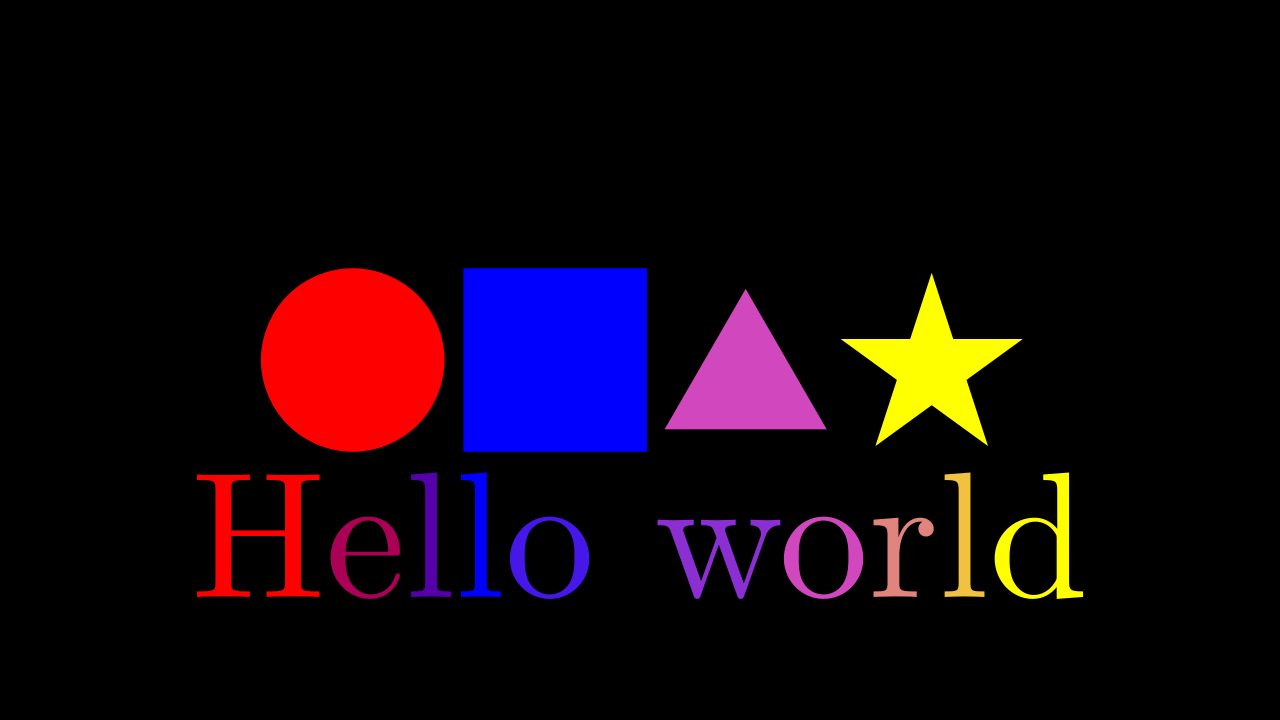

In [10]:
%%manim -qm -v WARNING Ex4

class Ex4(Scene):
    def construct(self):
        colors = [PURE_RED, PURE_BLUE, PINK, YELLOW]

        figs = VGroup(Circle(),Square(),Triangle(),Star())\
            .set_fill(opacity=1)\
            .arrange(RIGHT)

        text = Tex("Hello world")\
            .scale(4)\
            .next_to(figs,DOWN)
            
        text.set_color_by_gradient(*colors)
        figs.set_color_by_gradient(*colors)

        self.add(figs,text)

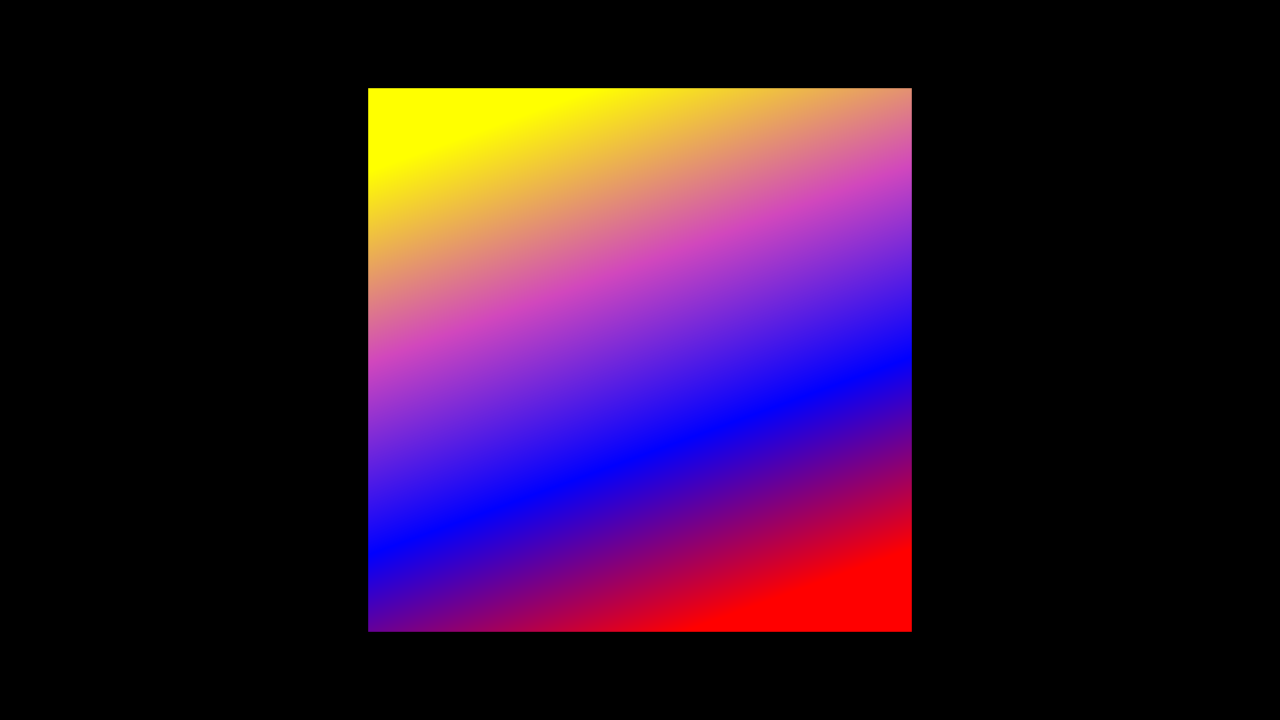

In [11]:
%%manim -qm -v WARNING Ex5

class Ex5(Scene):
    def construct(self):
        colors = [PURE_RED, PURE_BLUE, PINK, YELLOW]

        sq = Square(fill_opacity=1).scale(3)

        sq.set_color(color=colors)

        sq.set_sheen_direction(UP)
        sq.rotate_sheen_direction(20*DEGREES)

        self.add(sq)

In [20]:
%%manim -qm -v WARNING Ex6

config.assets_dir = "assets"

class Ex6(Scene):
    def construct(self):
        sq = Square(fill_opacity=1).scale(2)
        sq.color_using_background_image("back_img.png")
        
        self.add(sq)
        self.wait()
        self.play(sq.animate.shift(DOWN*2))
        self.play(sq.animate.shift(LEFT*2))
        self.play(sq.animate.scale(1/2))
        self.wait()

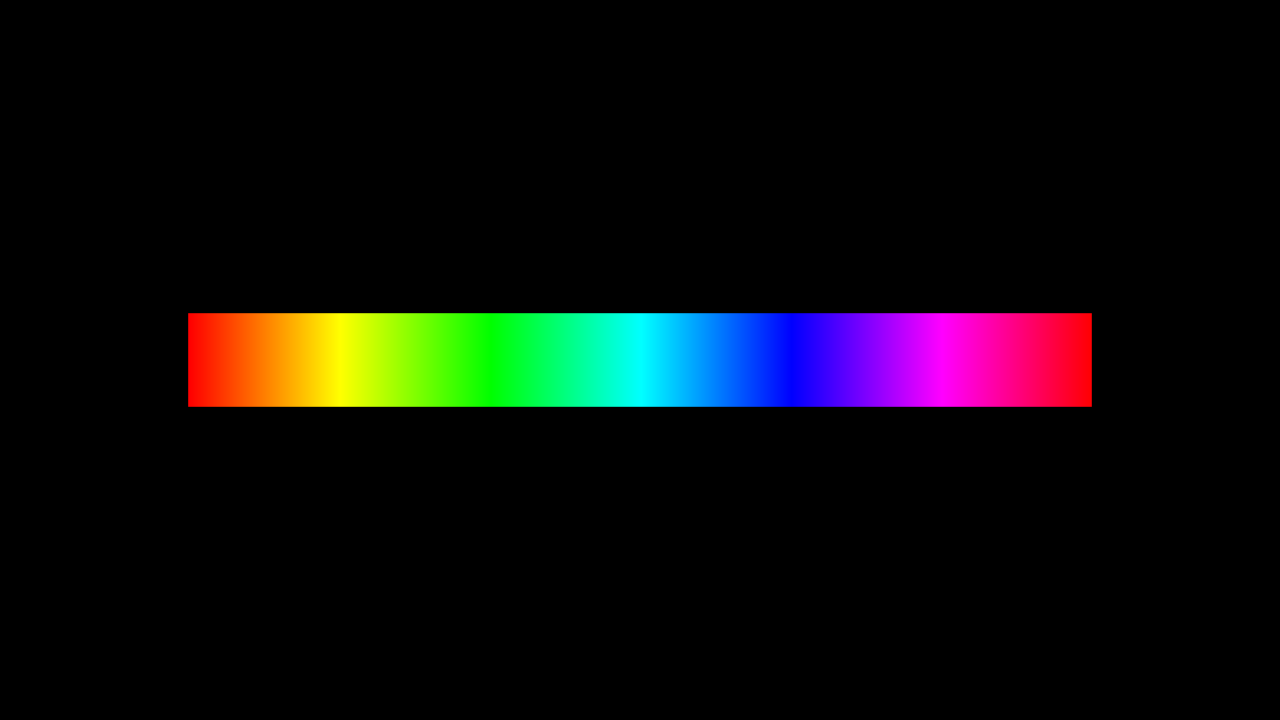

In [21]:
%%manim -qm -v WARNING Ex7

class Ex7(Scene):
    def construct(self):
        from colour import Color

        def HSL(hue,saturation=1,lightness=0.5):
            return Color(hsl=(hue,saturation,lightness))

        r = Rectangle(width=10,height=1,fill_opacity=1)
        _360_colors = [*[HSL(i/360,1,0.5) for i in range(360)]]
        r.set_color(color=_360_colors)
        r.set_sheen_direction(RIGHT)

        self.add(r)

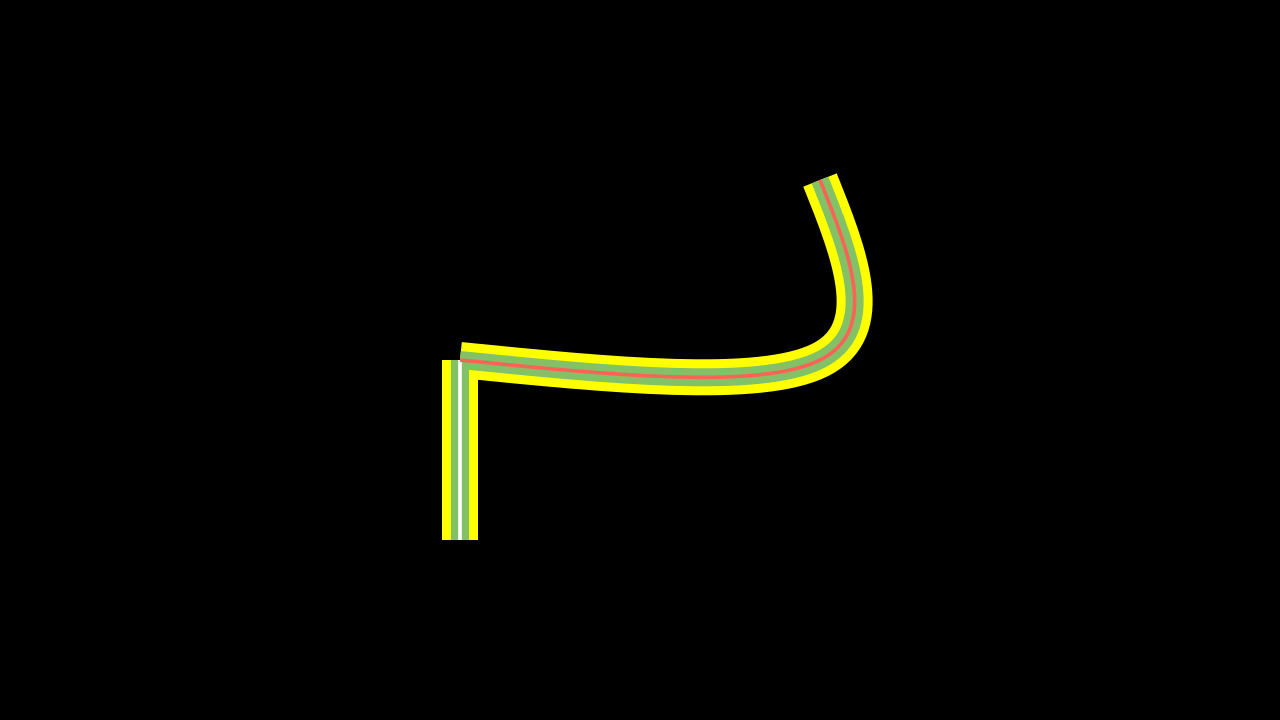

In [22]:
%%manim -qm -v WARNING Ex8

class Ex8(Scene):
    def construct(self):
        l1 = VMobject(color=WHITE)\
            .set_points_as_corners([LEFT*2,LEFT*2+DOWN*2])
        l2 = VMobject(color=RED)\
            .set_points_smoothly([
                LEFT*2,RIGHT*2,RIGHT*2+UP*2
            ])
        join_path = VMobject(color=GREEN,stroke_width=20)
        join_path.append_vectorized_mobject(l1)
        join_path.append_vectorized_mobject(l2)

        join_points = VMobject(color=YELLOW,stroke_width=40).set_points([
            *l1.points,*l2.points
        ])

        self.add(join_points,join_path,l1,l2)

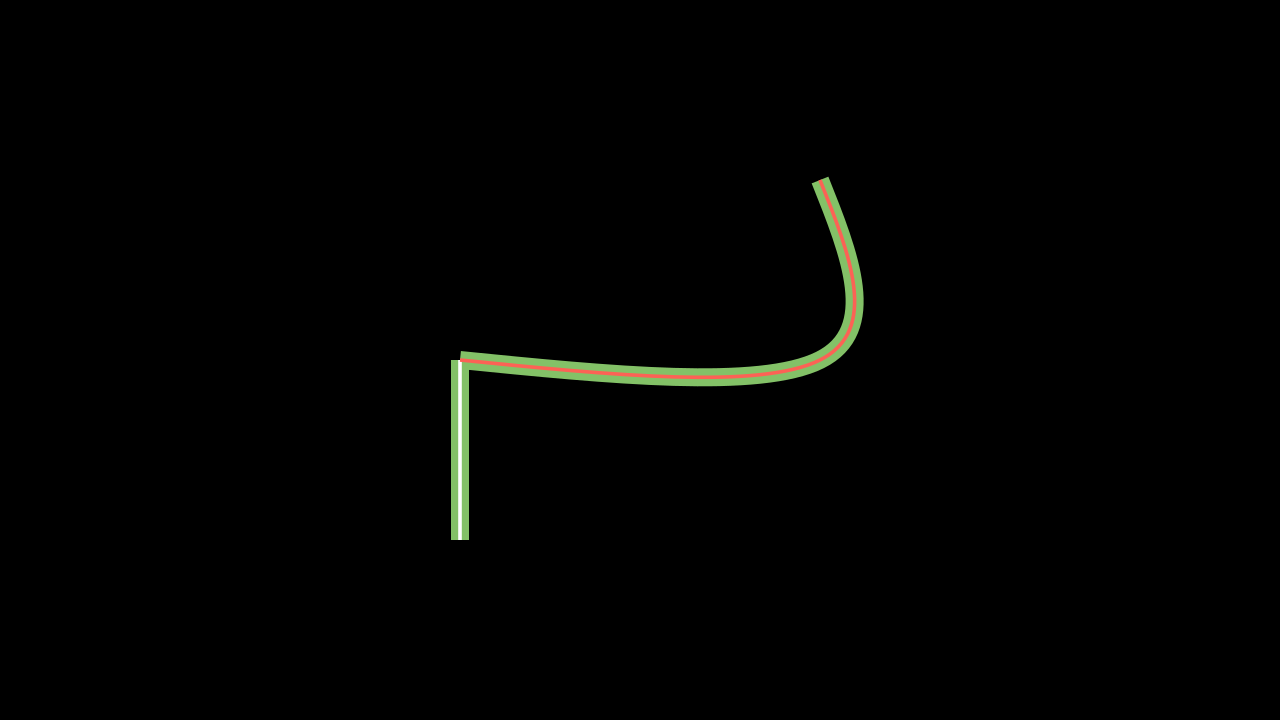

In [23]:
%%manim -qm -v WARNING Ex9

class Ex9(Scene):
    def construct(self):
        l1 = VMobject(color=WHITE)\
            .set_points_as_corners([LEFT*2,LEFT*2+DOWN*2])
        l2 = VMobject(color=RED)\
            .set_points_smoothly([
                LEFT*2,RIGHT*2,RIGHT*2+UP*2
            ])
        join_path = VMobject(color=GREEN,stroke_width=20)
        join_path.append_points(l1.points)
        join_path.append_points(l2.points)

        self.add(join_path,l1,l2)

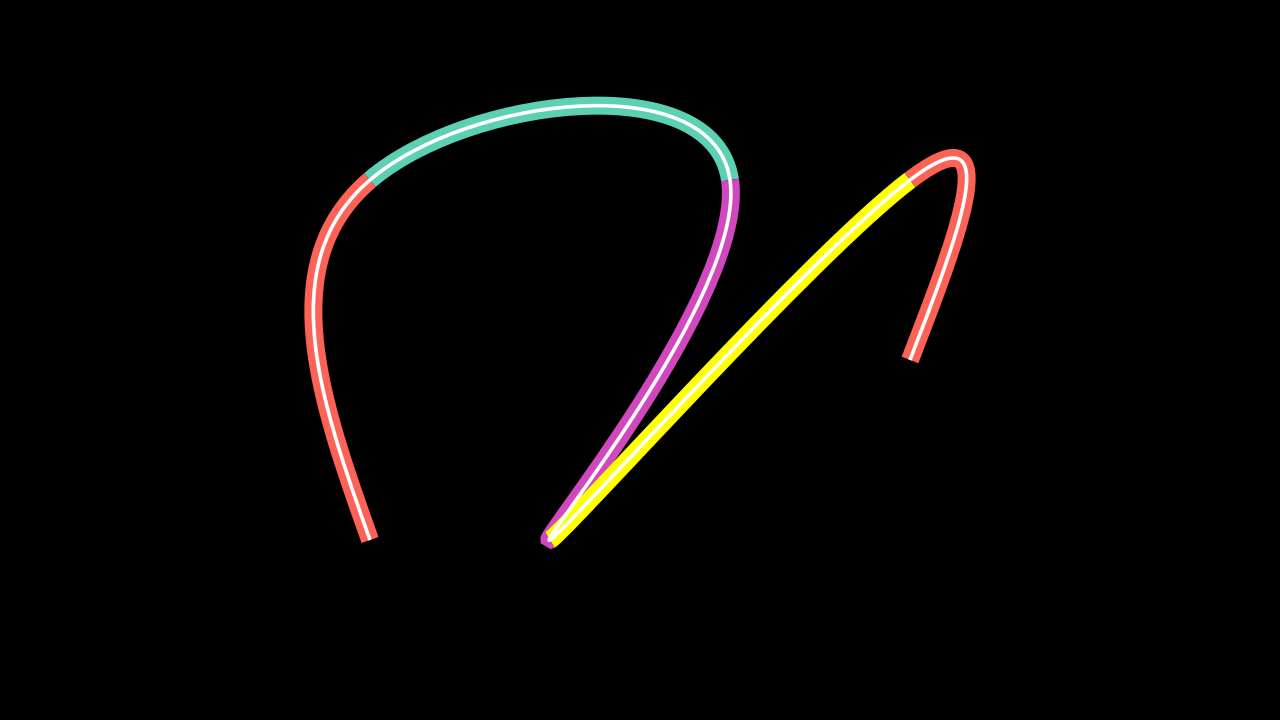

In [27]:
%%manim -qm -v WARNING Ex10

class Ex10(Scene):
    def construct(self):
        path = VMobject().set_points_smoothly([
            ORIGIN,
            UP*2,
            UP*2+RIGHT*2,
            UP*2+RIGHT*2+DOWN*2+LEFT,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2,
            UP*2+RIGHT*2+DOWN*2+LEFT+UR*2+DOWN
        ]).move_to(ORIGIN).scale(2)
        from itertools import cycle
        colors = cycle([RED,TEAL,PINK,YELLOW])
        # sub_curves = VGroup(*[
        #     VMobject(color=next(colors),stroke_width=15).set_points(p)
        #     for p in path.get_cubic_bezier_tuples()
        # ])
        # or
        sub_curves = CurvesAsSubmobjects(path)
        [sc.set_style(stroke_color=next(colors),stroke_width=20) for sc in sub_curves]

        self.add(sub_curves,path)

In [28]:
%%manim -qm -v WARNING Ex11

class Ex11(Scene):
    def construct(self):
        text = Tex("Original").scale(2)

        text.save_state()

        text_2 = Tex("Modified")\
               .scale(2)\
               .set_color(ORANGE)\
               .to_corner(DL,buff=2)

        self.add(text)

        self.play(Transform(text,text_2))
        self.play(
            text.animate
                .shift(RIGHT)
                .rotate(PI/4)
                .scale(2)
        )
        self.play(Restore(text))

        self.wait(0.7)

In [29]:
%%manim -qm -v WARNING Ex12

class Ex12(Scene):
    def construct(self):
        path = VMobject().set_points_as_corners([LEFT*4,RIGHT*4])
        path2 = path.copy()
        path2.reverse_points() # <- reverse points
        VGroup(path,path2).arrange(DOWN,buff=2)

        red_dot  = Dot(color=RED)
        blue_dot = Dot(color=BLUE)

        self.add(path,path2)
        self.play(
            MoveAlongPath(red_dot,path),
            MoveAlongPath(blue_dot,path2),
            run_time=3
        )
        self.wait()

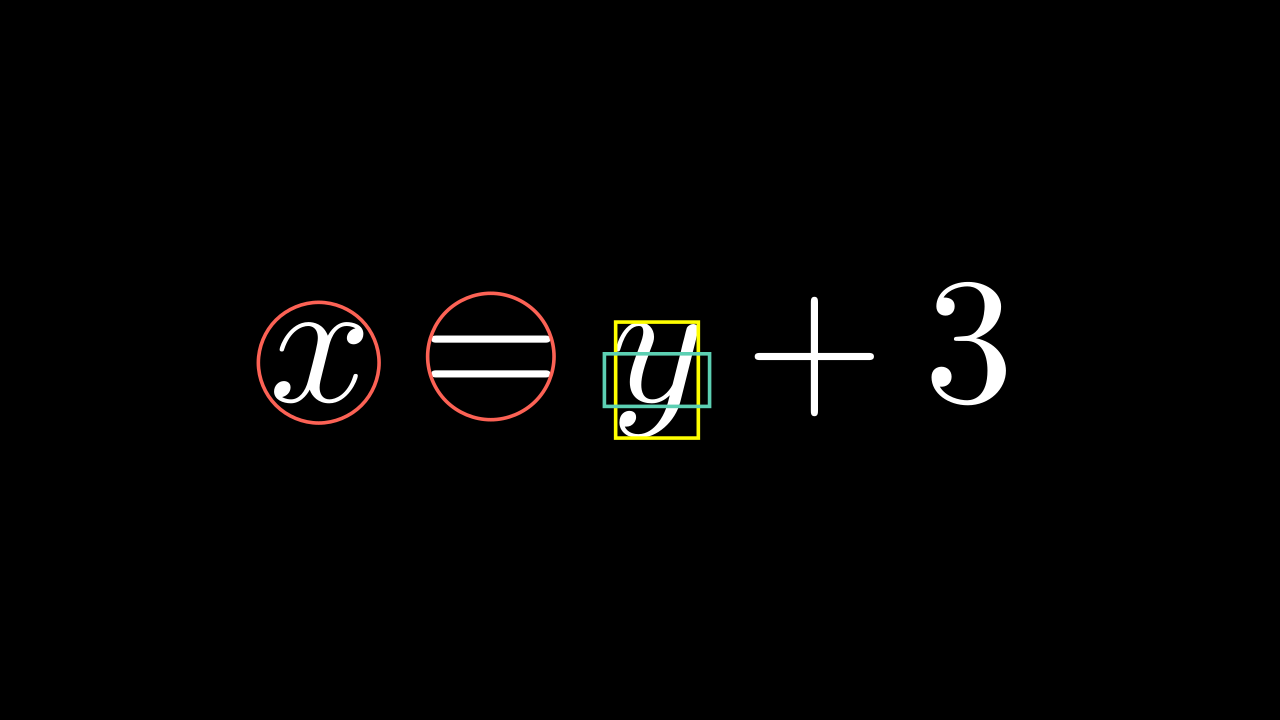

In [30]:
%%manim -qm -v WARNING Ex13

class Ex13(Scene):
    def construct(self):
        formula = MathTex("x","=","y","+","3").scale(4)
        # circles use buffer_factor
        sm1 = Circle().surround(formula[0],buffer_factor=1) # buffer_factor=1.2) by default
        sm2 = Circle().surround(formula[1],buffer_factor=1) 
        # other shapes use buff
        sm3 = Rectangle(color=YELLOW).surround(formula[2],stretch=True,buff=0) # To fix the ratio
        sm4 = Rectangle(color=TEAL).surround(formula[2])

        self.add(
            formula,
            sm1,sm2,sm3,sm4
        )

In [31]:
%%manim -qm -v WARNING Ex14

class Ex14(Scene):
    def construct(self):
        formula = MathTex("x","=","y","+","3").scale(4)
        # circles use buffer_factor
        sm1 = Circle().surround(formula[0]) # buffer_factor=1.2) by default
        sm2 = Circle().surround(formula[1],buffer_factor=1) 
        # other shapes use buff
        sm3 = Rectangle(color=YELLOW).surround(formula[2],stretch=True,buff=0) # To fix the ratio
        sm4 = Rectangle(color=TEAL).surround(formula[2])

        self.add(
            formula,
        )
        self.play(ShowPassingFlash(sm1))
        self.play(ShowPassingFlash(sm2,time_width=0.5))
        self.play(ShowPassingFlash(sm3,time_width=1,run_time=2,rate_func=linear))
        self.play(ShowCreationThenFadeOut(sm4))
        self.wait()

[08/04/22 20:44:50] WARNING  The class ShowCreationThenFadeOut has been deprecated since v0.15.0 ]8;id=438690;file://D:\python\manim\manim_test\lib\site-packages\manim\utils\deprecation.py\deprecation.py]8;;\:]8;id=365777;file://D:\python\manim\manim_test\lib\site-packages\manim\utils\deprecation.py#218\218]8;;\
                             and is expected to be removed after v0.16.0. Use Create then                          
                             FadeOut to achieve this effect.                                                       